In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# 手書き文字の画像をロードするデータセット。64個の特徴量で手書き文字を表している。
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
x = digits.data
y = digits.target

# 1794の文字に対して、64個の特徴がある。
x.shape

(1797, 64)

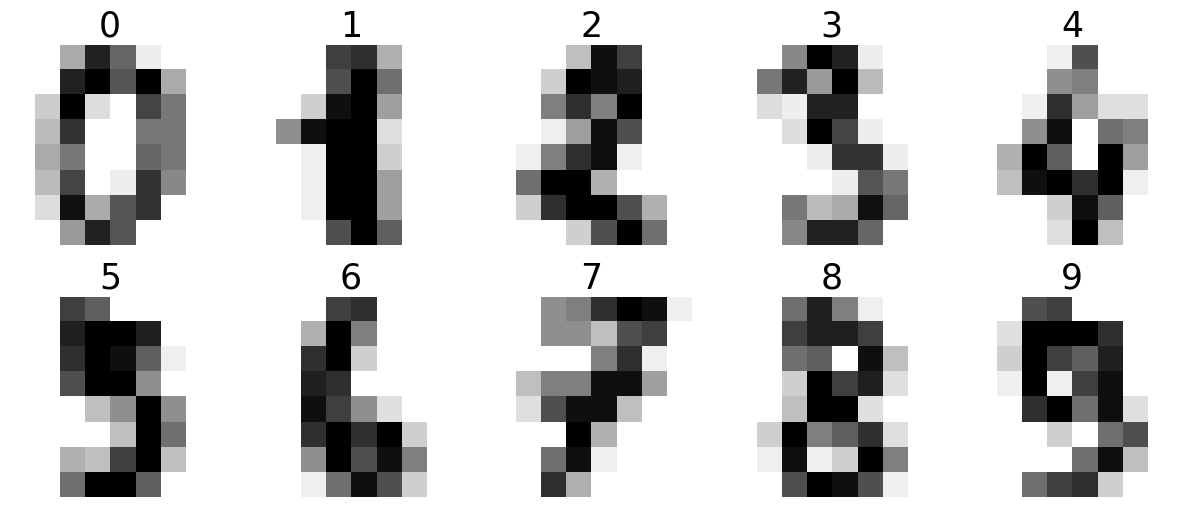

In [4]:
images_with_labels = list(zip(digits.images,digits.target))

plt.figure(figsize=(15,6))
for idx,(image,label) in enumerate(images_with_labels[:10]):
    plt.subplot(2,5,idx + 1)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.axis('off')
    plt.title('{}'.format(label),fontsize=25)

# digits.dataに格納されている手書き文字をグラフ化
plt.show()

In [5]:
# なぜ、荒い画像なのか
# 8x8 pixcel
digits.images.shape

(1797, 8, 8)

In [6]:
# この手書き文字10個の分類をロジスティック回帰で実現させる

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
# データをtrainとtestに分割　乱数は固定
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [8]:
# データを標準化(平均0 分散1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled

array([[ 0.        ,  2.85610953,  1.62260165, ...,  0.89887909,
         1.74648816,  0.38393236],
       [ 0.        , -0.33833791, -0.88123922, ...,  1.06879069,
        -0.25013357, -0.18751172],
       [ 0.        , -0.33833791, -0.255279  , ...,  0.38914426,
        -0.49971129, -0.18751172],
       ...,
       [ 0.        , -0.33833791, -0.04662559, ..., -1.14006023,
        -0.49971129, -0.18751172],
       [ 0.        , -0.33833791, -0.255279  , ..., -1.14006023,
        -0.49971129, -0.18751172],
       [ 0.        , -0.33833791,  0.16202781, ...,  0.72896748,
        -0.49971129, -0.18751172]])

In [9]:
# ロジスティック回帰学習実行
log_reg = LogisticRegression().fit(x_train_scaled, y_train)

# 学習結果
log_reg.intercept_, log_reg.coef_

(array([ 1.65847736e-03, -7.21689838e-01, -3.23437932e-01, -5.35672860e-02,
        -4.32366864e-01,  4.53907622e-01, -6.82554274e-01,  1.68010739e-02,
         2.16486734e+00, -4.23618318e-01]),
 array([[ 0.00000000e+00,  1.02681040e-02, -8.99020725e-02,
          1.99558906e-01,  2.03800771e-02, -4.11236526e-01,
         -2.78863278e-01, -3.15947551e-02, -1.44458139e-02,
         -6.91970071e-02, -1.54964516e-01,  3.50686165e-01,
          1.09495615e-01,  1.45028565e-01, -1.45656048e-01,
         -4.66643999e-02, -1.55714792e-04,  1.43737155e-01,
          1.99386930e-01, -4.64699116e-02, -7.25746221e-01,
          4.42688414e-01,  1.65715612e-01, -3.87204498e-02,
         -3.36549590e-04,  2.37150729e-01,  2.63021358e-01,
         -4.35584238e-01, -1.21496766e+00,  5.85705374e-02,
          3.81389662e-01, -3.15982066e-03,  0.00000000e+00,
          3.42484562e-01,  2.94043771e-01, -5.28464320e-01,
         -9.75228280e-01,  1.15478958e-01,  2.11097518e-01,
          0.00000000e+00

In [10]:
# 10は分類するクラスの数、それぞれ分類するためのパラメータが64個ある。
log_reg.coef_.shape

(10, 64)

In [11]:
# 予測してみる
prediction = log_reg.predict(x_test_scaled)

# 予測値を表示
prediction

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [12]:
# 正解の分類を表示
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [13]:
# 予測と正解の分類が一致する場合はTrue
prediction == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [14]:
# 混同行列を求める
from sklearn.metrics import confusion_matrix

In [15]:
confusion = confusion_matrix(prediction, y_test)

# 0と認識されたものが37個
# 1と認識されたものが42個、、、
confusion

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 46]], dtype=int64)

In [16]:
# 正解率
log_reg.score(x_test, y_test)

0.7666666666666667